<h1>Random Baseline</h1>


Here we evaluate the random baseline in the touch only grasping setting on the test set. Because we call with the visualize parameters as True we can view the predicted objects with actions chosen randomly. 

In [1]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction import vision 
from pterotactyl.policies.baselines import rand
from pterotactyl import pretrained

TOUCH_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/touch/best/'
VISION_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/vision/t_g/'




class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "random_example"
        self.finger = False 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = False
        self.touch_location = TOUCH_LOCATION
        self.vision_location = VISION_LOCATION
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = True 
        self.pretrained_recon = True
        
    

params = Params()
random_test = rand.Engine(params)
random_test()

pybullet build time: Sep 20 2021 20:33:29
/private/home/ejsmith/.conda/envs/cluster/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4302.75it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:02<00:12,  2.41s/it]

Valid || score: 0.1293 reward = 0.8707 ave: 12.9286 %


 33%|███████████████████████████▋                                                       | 2/6 [00:03<00:07,  1.81s/it]

Valid || score: 0.1196 reward = 0.8804 ave: 12.4455 %


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:05<00:04,  1.62s/it]

Valid || score: 0.2127 reward = 0.7873 ave: 15.3874 %


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:06<00:03,  1.53s/it]

Valid || score: 0.2799 reward = 0.7201 ave: 18.5386 %


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:07<00:01,  1.48s/it]

Valid || score: 0.1675 reward = 0.8325 ave: 18.1801 %


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:09<00:01,  1.48s/it]

Valid || score: 0.1777 reward = 0.8223 ave: 18.1113 %
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.56s/it]

argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

tensor([12.9336,  3.9790,  2.8664,  2.3931,  2.0650,  1.8981])
tensor([1.0000, 0.4421, 0.3187, 0.2601, 0.1958, 0.1811])
visualizing
******************************
*********************************************
Total Valid || score: 0.1811, reward = 0.8189
*********************************************


We can now visualize the predicted objects with random actions, and also the distribution of chosen actions both in a histogram and projected from the shpere of posssible actions into image space. 

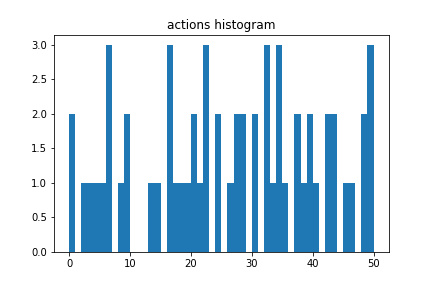




   Projected Actions


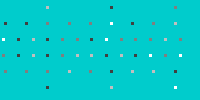

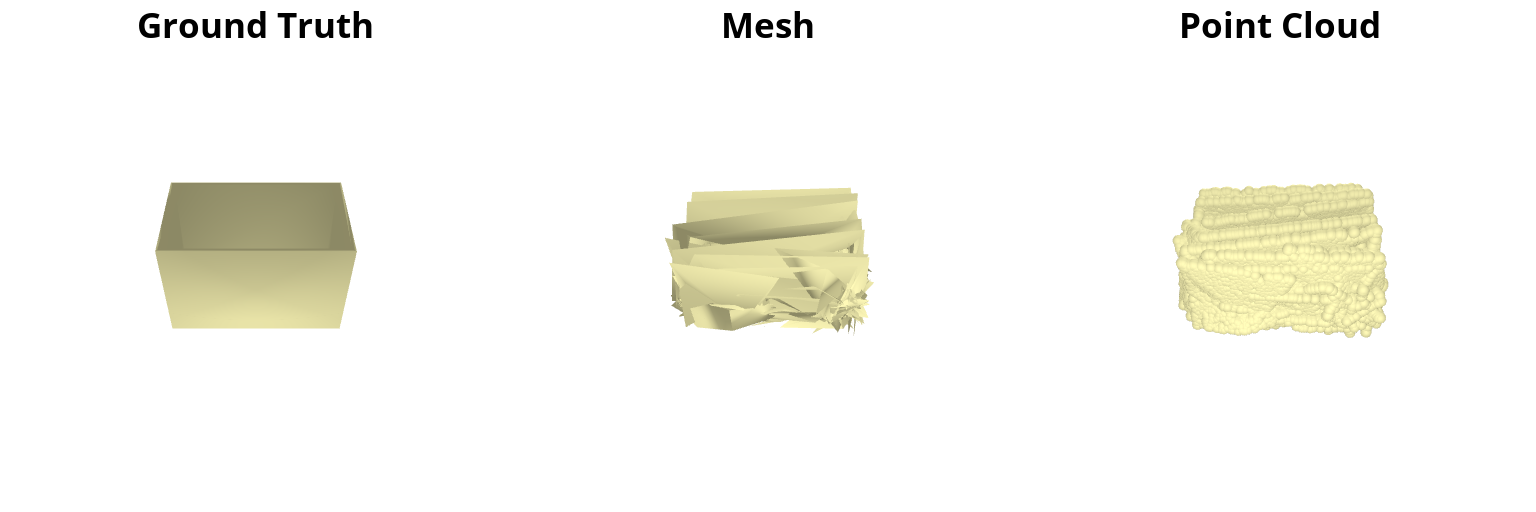

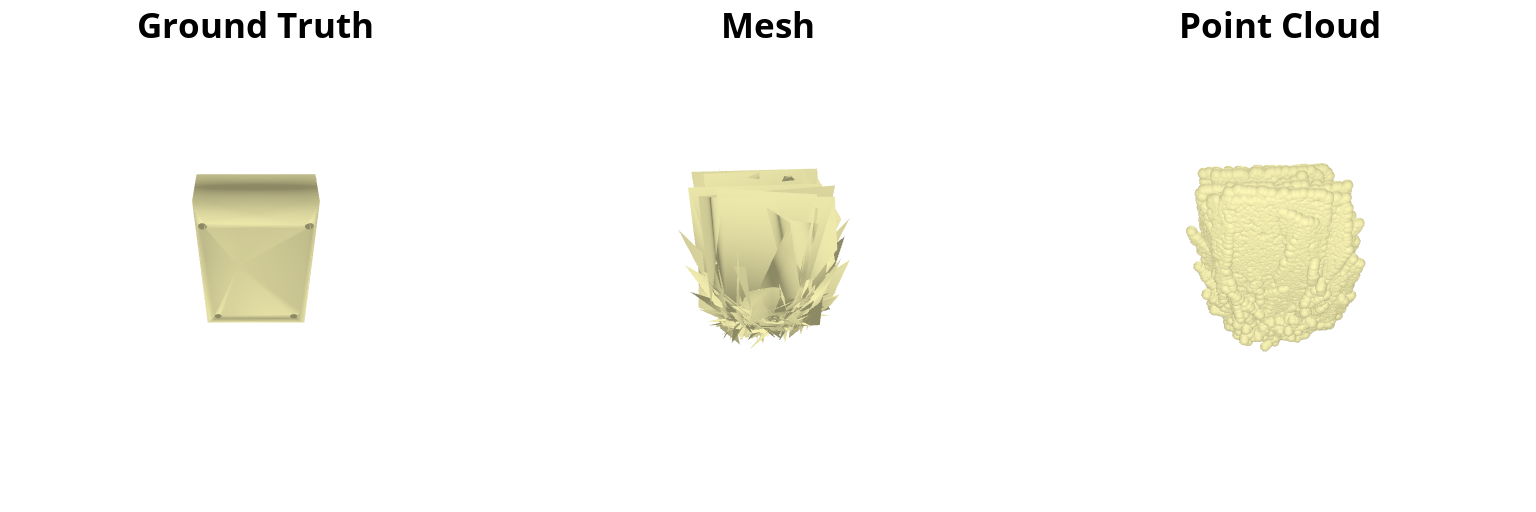

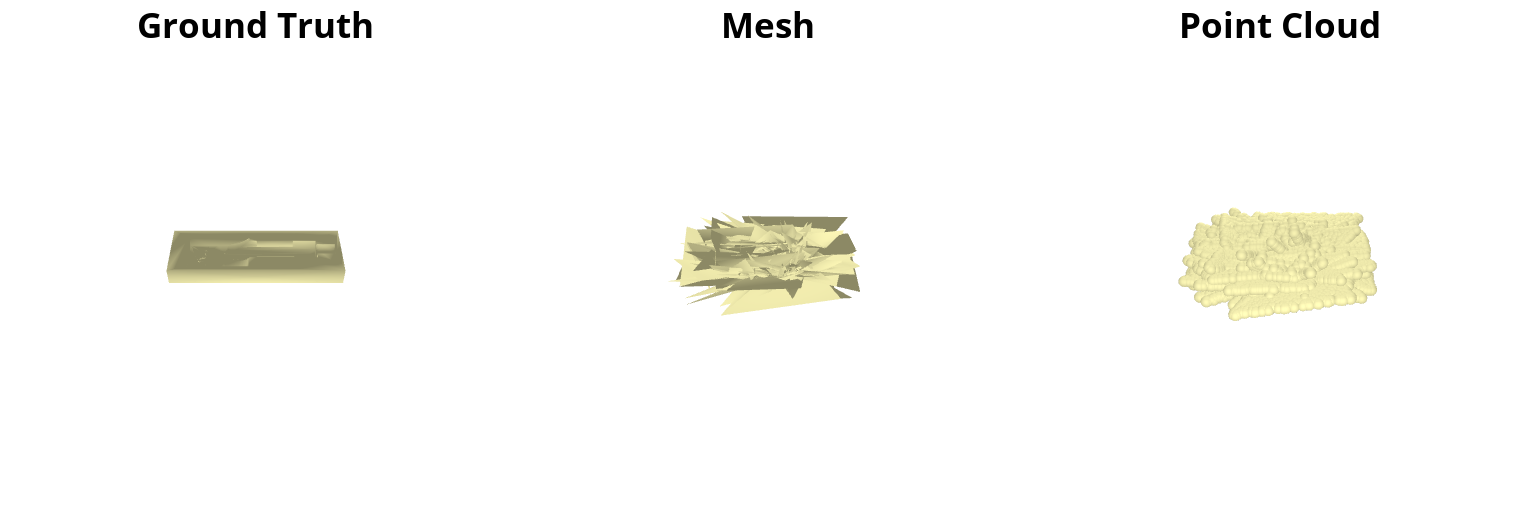

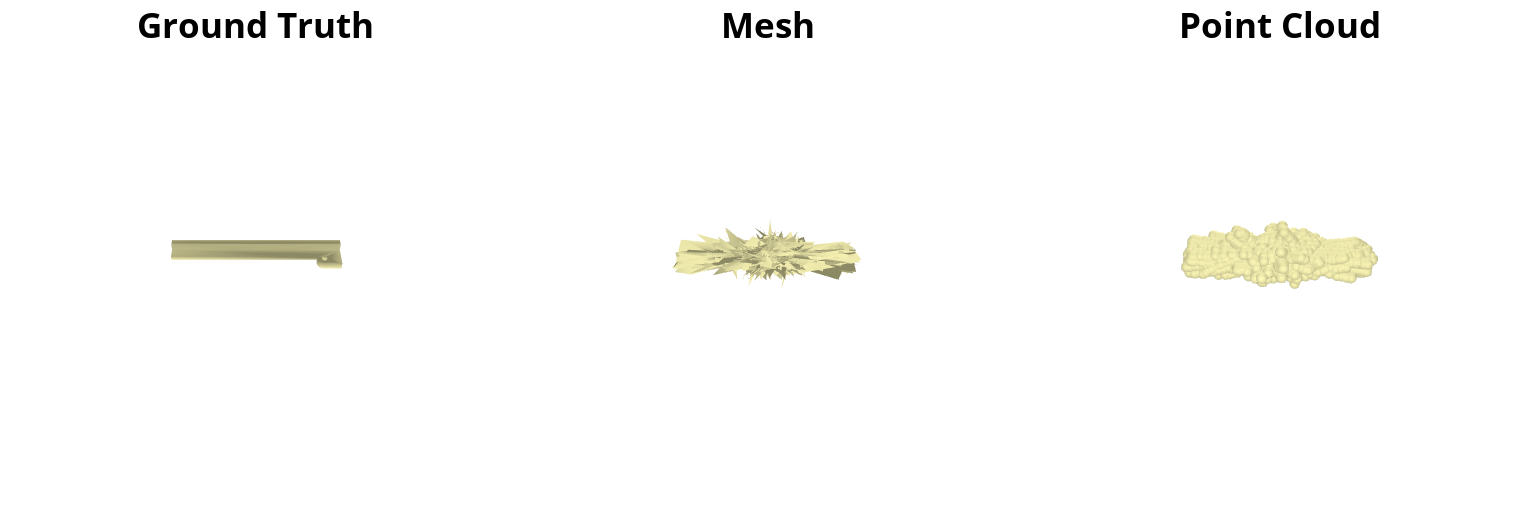

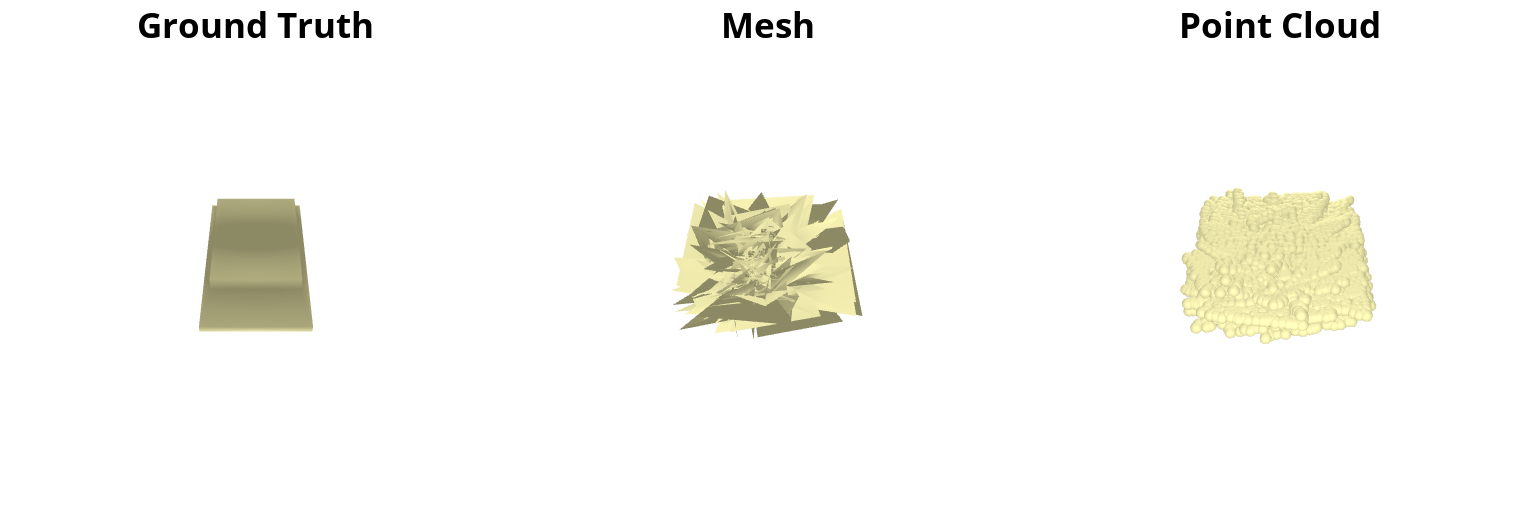

In [2]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


histogram = Image.open('results/random_example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/random_example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/random_example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)